In [1]:

import pandas as pd
import numpy as np


In [2]:
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

ModuleNotFoundError: No module named 'matplotlib'

In [7]:
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors

plt.rc('text', usetex=True)
mpl.rcParams['errorbar.capsize'] = 3
colors_fig = list(mcolors.TABLEAU_COLORS.values())

In [5]:
def figura(x, y, title='ioaisoipasip', x_label=r'x label ()', y_label='y label ()', size=8, zero=False):
        
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    figure = plt.figure(figsize=(size, size));
    
    plt.title ('{}'.format(title),   fontsize=30, color='k', x=0.5, y= 1.10)
    plt.xlabel('{}'.format(x_label), fontsize=20, x = 0.75, labelpad = 20)
    plt.ylabel('{}'.format(y_label), fontsize=20, y = 0.75, labelpad = 20)
    plt.tick_params(labelsize=12)
    
    plt.scatter(x,y, s=80, alpha=0.4);
    plt.plot(x, y, lw=4, c='r', alpha=0.2);
    
    if zero:
        plt.axvline(x=0, alpha=0.5, lw=2, color='skyblue')
        plt.axhline(y=0, alpha=0.5, lw=2, color='skyblue')
    
    return figure


In [9]:
def figura_regresion(x, y, title='ioaisoipasip', x_label=r'x label ()', y_label='y label ()', size=8, zero=False, save=False):
    """
    función para obtener los datos de la regresin lineal
    """
    
    p, cov = np.polyfit(x, y, 1, cov=True)
    
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    #print '    Pendiente y su error              ', round(p[0], 3),  round(np.sqrt(cov[0][0]), 3), 2*'\n', \
    #      '    Ordenada en el origen y su error  ', round(p[1], 3),  round(np.sqrt(cov[1][1]), 3), 3*'\n'
    values = [round(p[0], 5), round(np.sqrt(cov[0][0]),5), round(p[1], 5), round(np.sqrt(cov[1][1]), 5)]
    values_text = r'  $ m \pm \Delta m$ = ' \
    + str(round(p[0], 3)) \
    + r' $\pm$ ' \
    + str(round(np.sqrt(cov[0][0]), 3)) + '$\\\ \\\$' \
    + r'  $\indent n \pm \Delta n$ = ' + str(round(p[1], 3)) + r' $\pm$ ' + str(round(np.sqrt(cov[1][1]), 3))
   
    figure = plt.figure(figsize=(size, size), constrained_layout=True);
    spec_1 = gridspec.GridSpec(ncols=1, nrows=1, figure=figure)
    fig_ax0 = figure.add_subplot(spec_1[0,0:4])
    axes = [fig_ax0]
    
    for i in axes:
        i.tick_params(axis='y', labelsize=20, pad=10, length=12)
        i.tick_params(axis='x', labelsize=20, pad=10, length=12)
    
    #axes[0].set_title ('{}'.format(title),   fontsize=30, color='k', x=0.5, y= 1.10)
    axes[0].set_xlabel('{}'.format(x_label), fontsize=20, x = 0.75, labelpad = 20)
    axes[0].set_ylabel('{}'.format(y_label), fontsize=20, y = 0.75, labelpad = 20)
 
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)

    if values[0] > 0:
        axes[0].text(0.85, 0.05, values_text, fontsize=20, bbox=bbox, transform=axes[0].transAxes, horizontalalignment='right',)
    else:
        axes[0].text(0.85, 0.85, values_text, fontsize=20, bbox=bbox, transform=axes[0].transAxes, horizontalalignment='right',)
    
    axes[0].plot(x, p[0]*x+p[1], lw=4, c='r', alpha=0.2);
    axes[0].scatter(x, np.polyval(p, x), s=80, marker='+', c='k');
    #plt.plot([0, min(x)], np.polyval(p, [0, min(x)]), lw=4, alpha =0.2, c='k');
    
    if zero:
        axes[0].axvline(x=0, alpha=0.5, lw=2, color='skyblue')
        axes[0].axhline(y=0, alpha=0.5, lw=2, color='skyblue')
        
#    if save:
#        file_name = raw_input(u"Introduce el nombre del archivo\n para guardar la figura\n\n Se guardar\'a en formato .pdf    ")
#        axes[0].savefig(file_name + '.pdf', format='pdf')

    
    return [figure, values]


# Datos Práctica Electricidad I, 

### 2024-05-10

In [14]:
data_1 = pd.DataFrame({'resistencia': [10.,20.,50.,70.,100.,150.],
                       'voltaje': [1371.,1420.,1452.,1461.,1465.,1469.]})

data_2 = pd.DataFrame({'resistencia': [10.,20.,50.,100.,150.],
                       'voltaje': [241.,416.,727.,973.,1097.]})

data_3 = pd.DataFrame({'resistencia': [20.,50.,70.,100.,150.],
                       'voltaje': [719.,1036.,1132.,1217.,1291]})

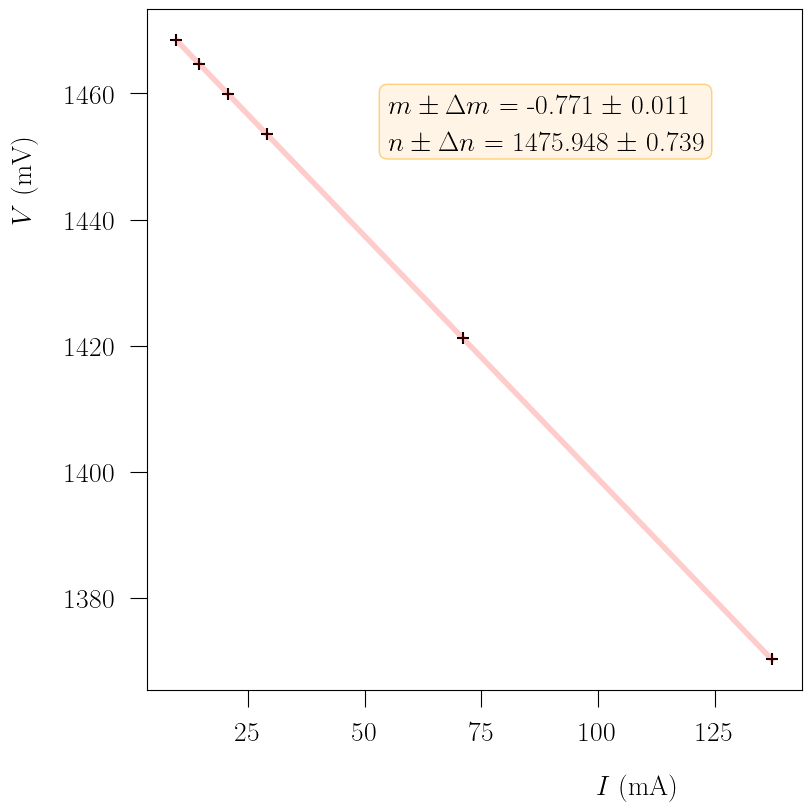

In [15]:
regresion_1 = figura_regresion(data_1["voltaje"]/data_1["resistencia"], data_1['voltaje'],
                               x_label="$I~\\textrm{(mA)}$",
                               y_label='$V~\\textrm{(mV)}$', save=False)
values_data_1 = regresion_1[1]
values_data_1

plt.savefig('data_1' + '.pdf', format='pdf', dpi=180, bbox_inches="tight")

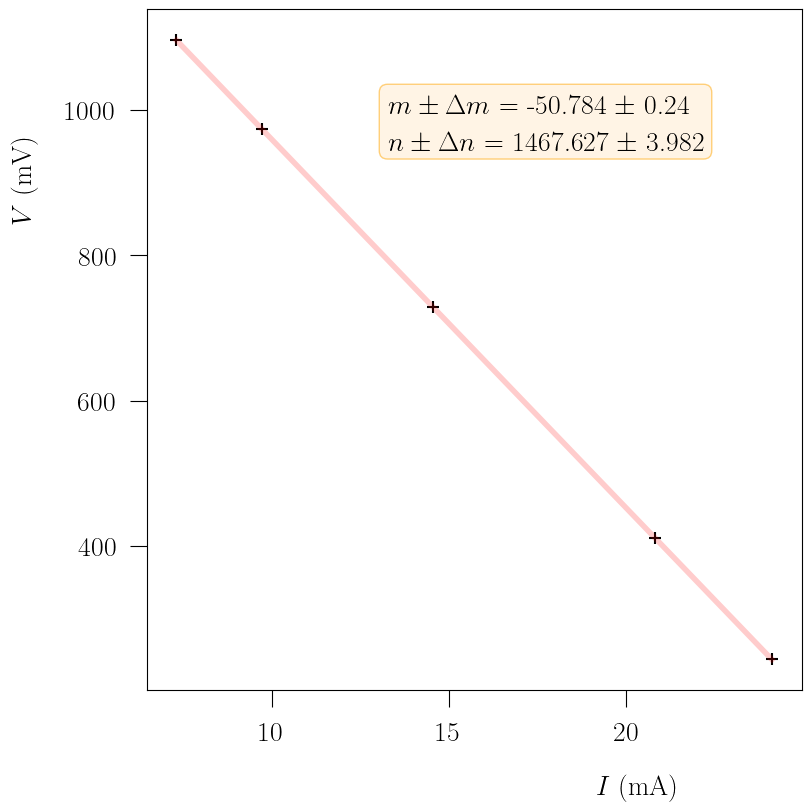

In [9]:
regresion_2 = figura_regresion(data_2["voltaje"]/data_2["resistencia"], data_2['voltaje'],                               
                               x_label="$I~\\textrm{(mA)}$",
                               y_label='$V~\\textrm{(mV)}$', save=False)
values_data_2 = regresion_2[1]
values_data_2

plt.savefig('data_2' + '.pdf', format='pdf', dpi=180, bbox_inches="tight")

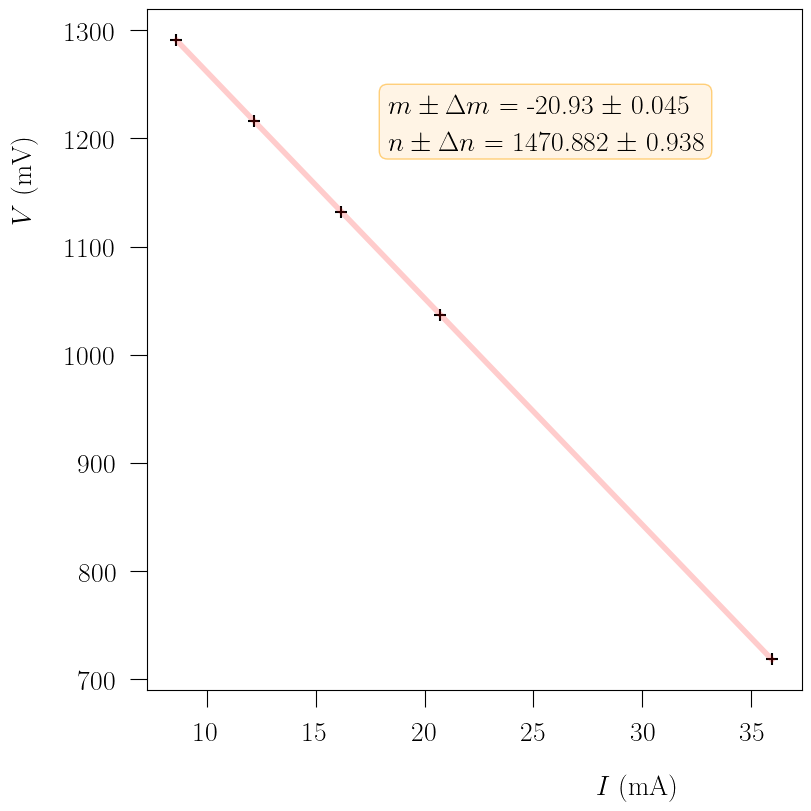

In [10]:
regresion_3 = figura_regresion(data_3["voltaje"]/data_3["resistencia"], data_3['voltaje'],
                               x_label="$I~\\textrm{(mA)}$",
                               y_label='$V~\\textrm{(mV)}$', save=False)
values_data_3 = regresion_3[1]
values_data_3

plt.savefig('data_3' + '.pdf', format='pdf', dpi=180, bbox_inches="tight")